# Problem 1 - (c)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
np.random.seed(202224790)

In [ ]:
N = np.random.poisson(lam=10, size=1000)
i = 0
rv_x = []
rv_y = []
for n in N:
    X = np.random.binomial(n=n, p=0.3)
    Y = n - X
    if i % 50 == 0:
        print(f"{i}th iteration\tX: {X}\tY: {Y}")
    rv_x.append(X)
    rv_y.append(Y)
    i += 1

0th iteration	X: 7	Y: 7
50th iteration	X: 4	Y: 7
100th iteration	X: 0	Y: 10
150th iteration	X: 5	Y: 9
200th iteration	X: 6	Y: 5
250th iteration	X: 5	Y: 5
300th iteration	X: 2	Y: 3
350th iteration	X: 3	Y: 10
400th iteration	X: 4	Y: 5
450th iteration	X: 4	Y: 11
500th iteration	X: 2	Y: 6
550th iteration	X: 3	Y: 4
600th iteration	X: 2	Y: 10
650th iteration	X: 0	Y: 5
700th iteration	X: 3	Y: 5
750th iteration	X: 2	Y: 7
800th iteration	X: 5	Y: 13
850th iteration	X: 3	Y: 3
900th iteration	X: 2	Y: 10
950th iteration	X: 2	Y: 3


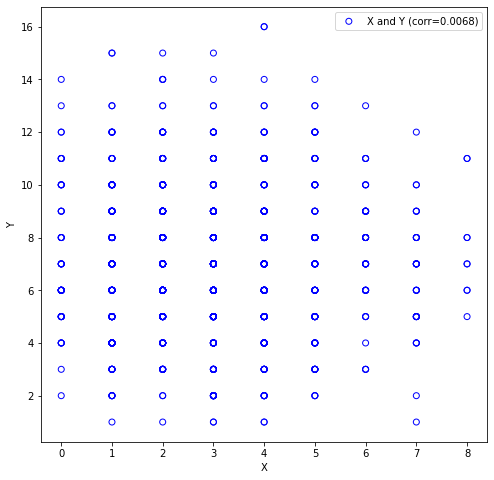

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(rv_x, rv_y, facecolors='none', edgecolors='blue', label=f"X and Y (corr={stats.pearsonr(rv_x, rv_y)[0]:.4f})")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')
plt.show()

In [ ]:
stats.pearsonr(rv_x, rv_y)

(0.006821472216330582, 0.8294191406294532)

# Problem 2

In [ ]:
from scipy import stats
X = stats.norm(loc=3, scale=4)

In [ ]:
# (a)
print(X.cdf(7))

0.8413447460685429


In [ ]:
# (b)
print(1 - X.cdf(-2)) # 1-F(-2) = 1-Pr(X<-2) = Pr(X>-2)

0.8943502263331446


In [ ]:
# (c)
## P(X>x) = 0.05 -> P(X<x) = 0.95 -> x = F^{-1}(0.95)
print(X.ppf(0.95))

9.57941450780589


In [ ]:
# (d)
## P(0<=X<4) = P(0<X<4) = P(X<4) - P(X<0)
print(X.cdf(4) - X.cdf(0))

0.3720789733060555


In [ ]:
# (e)
## P(|X| > |x|) = 0.05 -> P(X<-x) + P(X>x) = P(X<-x) + (1-P(X<x)) = 0.05 -> from the perspective of positive nums
## need a numerical approach
epsilon = 1e-7
samples = np.linspace(0, 10, num=10000)
answer = 0
for sam in samples:
    if (X.cdf(-sam) + (1-X.cdf(sam))) - 0.05 <= epsilon:
        print(sam)
        answer = sam
        break

9.611961196119612


In [ ]:
X.cdf(-answer) + (1 - X.cdf(answer))

0.049974454844585556

# Problem 3 - (b)

In [ ]:
(5/4) ** 20 * 20000

1734723.475976807

In [ ]:
games = 1000
rounds = 20
np.random.seed(24790)

expec = []
for i in range(games):
    init = 20000
    X = np.random.binomial(n=1, p=0.5, size=rounds)
    for j in range(X.shape[0]):
        item = X[j]
        if item == 0:
            init *= 0.5
        else:
            init *= 2
    expec.append(init)

In [ ]:
print(np.mean(expec))

1569289.9304199219


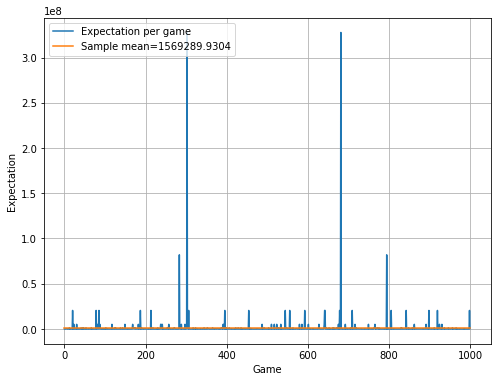

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(expec, label="Expectation per game")
plt.plot([0, 1000], [np.mean(expec), np.mean(expec)], label=f"Sample mean={np.mean(expec):.4f}")
plt.xlabel("Game")
plt.ylabel("Expectation")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

# Problem 5

In [ ]:
# initial_cases = 5
# time = 0
# loop_cases = 0
# while time < 20:
#     if time == 0:
#         loop_cases = initial_cases
#     else:
#         loop_cases = total_new_infection
#     total_new_infection = 0
#     for case in range(loop_cases): # for each case
#         X = np.random.poisson(lam=10, ) # close contacts induced by each case
#         newly_infected = np.random.binomial(n=X, p=0.2) # newly-infected case induced by each case
#         total_new_infection += newly_infected
#     time += 1
#     print(f"Time unit: {time}\tTotal new infections: {total_new_infection}")

In [ ]:
def covid_sim(n_current_case:int, time_unit:int, lam:int, infection_rate:float, policy:bool=False, 
              policy_time:int=None, new_rate:float=None, new_lam:int=None) -> np.ndarray:
    total_cases = np.zeros(shape=(time_unit+1, ))
    total_cases[0] = n_current_case
    if policy:
        if new_rate is not None: # if the policy is about probability
            for i in range(time_unit):
                # array containing the close-contacts induced by each case
                X = np.random.poisson(lam=lam, size=n_current_case) 
                if i < policy_time:
                    # array containing the new infections induced by each case
                    newly_infected = np.random.binomial(n=X, p=infection_rate)
                else:
                    newly_infected = np.random.binomial(n=X, p=new_rate)
                n_current_case = np.sum(newly_infected) # update the current case
                total_cases[i+1] = n_current_case
        if new_lam is not None: # if the policy is about lambda
            for i in range(time_unit):
                if i < policy_time:
                    X = np.random.poisson(lam=lam, size=n_current_case)
                else:
                    X = np.random.poisson(lam=new_lam, size=n_current_case)
                newly_infected = np.random.binomial(n=X, p=infection_rate)
                n_current_case = np.sum(newly_infected)
                total_cases[i+1] = n_current_case
    else:
        for i in range(time_unit):
            X = np.random.poisson(lam=lam, size=n_current_case)
            newly_infected = np.random.binomial(n=X, p=infection_rate) 
            n_current_case = np.sum(newly_infected)
            total_cases[i+1] = n_current_case
    return total_cases.astype(np.int64)

(100, 21)


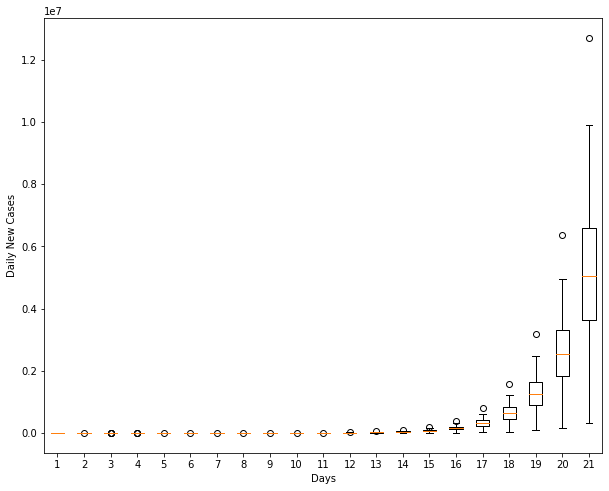

In [ ]:
# (a)
nsim = 100
out = []
for i in range(nsim):
    out.append(covid_sim(n_current_case=5, time_unit=20, lam=10, infection_rate=0.2))
a_out_array = np.array(out)
print(a_out_array.shape)

plt.figure(figsize=(10, 8))
plt.boxplot(a_out_array)
plt.xlabel("Days")
plt.ylabel("Daily New Cases")
plt.show()

(100, 21)
[[     5     15     30 ... 146836 206076 288671]
 [     5      6     10 ...  35180  49542  69245]
 [     5     11     25 ...  67036  93830 131528]
 ...
 [     5     13     23 ... 104782 146709 205364]
 [     5      6     21 ...  75648 105342 147347]
 [     5      9     12 ...  58740  82139 115366]]


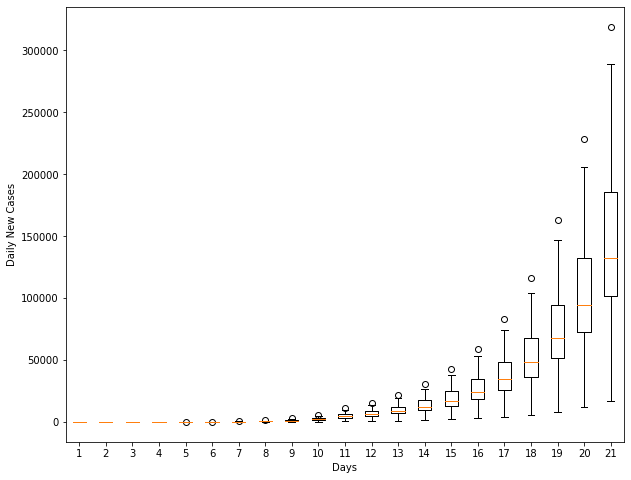

In [ ]:
## problem b
nsim = 100
out = []
for i in range(nsim):
    out.append(covid_sim(n_current_case=5, time_unit=20, lam=10, infection_rate=0.2, 
                         policy=True, policy_time=10, new_rate=0.14))
b_out_array = np.array(out)
print(b_out_array.shape)
print(b_out_array)

plt.figure(figsize=(10, 8))
plt.boxplot(b_out_array)
plt.xlabel("Days")
plt.ylabel("Daily New Cases")
plt.show()

(100, 21)
[[   5    8   19 ...  717  452  253]
 [   5    8   14 ...  528  322  183]
 [   5    9   15 ...  597  357  208]
 ...
 [   5    7   14 ...  921  542  336]
 [   5   13   26 ... 1419  864  562]
 [   5   10   21 ...  812  500  276]]


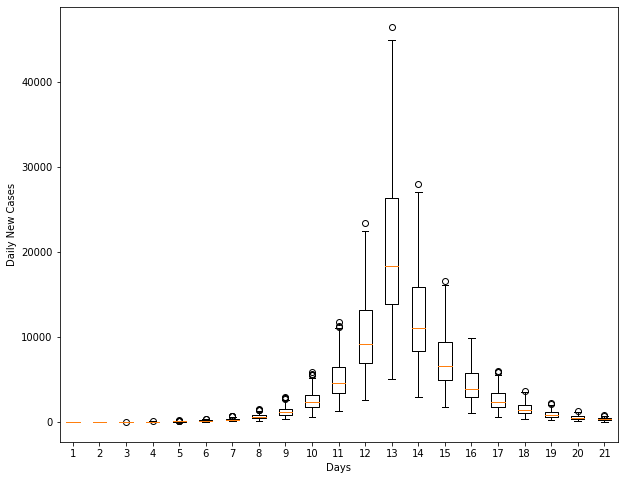

In [ ]:
## problem c
nsim = 100
out = []
for i in range(nsim):
    out.append(covid_sim(n_current_case=5, time_unit=20, lam=10, infection_rate=0.2, 
                         policy=True, policy_time=12, new_lam=3))
c_out_array = np.array(out)
print(c_out_array.shape)
print(c_out_array)

plt.figure(figsize=(10, 8))
plt.boxplot(c_out_array)
plt.xlabel("Days")
plt.ylabel("Daily New Cases")
plt.show()

12709232
319156
46446


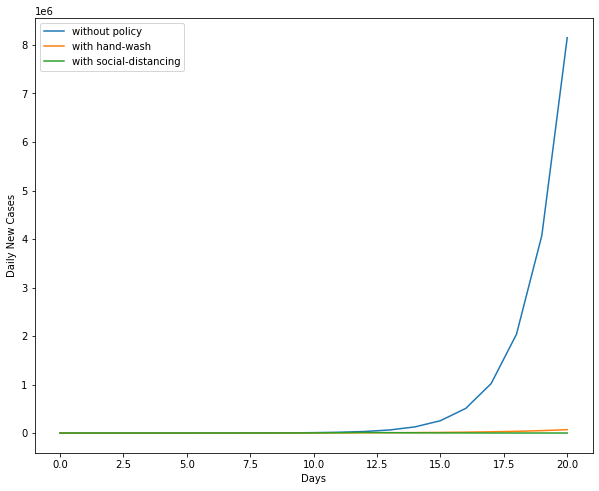

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(a_out_array[1], label="without policy")
plt.plot(b_out_array[1], label="with hand-wash")
plt.plot(c_out_array[1], label="with social-distancing")
plt.xlabel("Days")
plt.ylabel("Daily New Cases")
plt.legend()


print(np.max(a_out_array))
print(np.max(b_out_array))
print(np.max(c_out_array))